In [3]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output, Markdown, display_html
import openqlab

from nqlab import *
from nqlab.notebooks import summary
from nqstyles import use
    
def restartkernel() :
    """Use `restartkernel()` to restart the kernel from a cell."""
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
    
clear_output()

import cufflinks as cf
cf.go_offline()

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'nqlab'

In [3]:
data = io.read("opo_scan.csv", )
# del data["opo_scan_3"]
del data["opo_scan_4"]

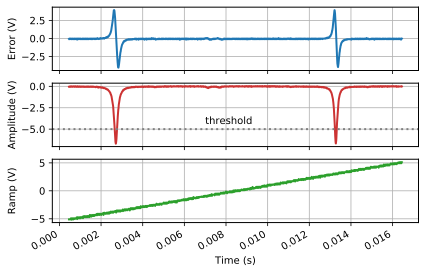

In [23]:
plot = data.plot(subplots=True, legend=False, grid=True)
plot[0].set_ylabel("Error (V)")
plot[1].set_ylabel("Amplitude (V)")
plot[1].axhline(y=-5, linewidth=2, color='gray', label='threshold', linestyle=':')
plot[1].text(.007, -4.4, "threshold")
plot[2].set_ylabel("Ramp (V)")
plot[0].figure.align_ylabels()
savefig("opo_scan.svg")

In [5]:
from openqlab import io
data = io.read("opo_scan.csv")
del data["opo_scan_4"]

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.express import colors as clrs
import numpy as np

THEME = clrs.qualitative.T10

fig = make_subplots(rows=3, cols=1, shared_xaxes=True)
fig.add_trace(
    go.Scatter(x=data.index, y=data["opo_scan_1"], showlegend=False), row=1, col=1,
)
fig.add_trace(
    go.Scatter(x=data.index, y=data["opo_scan_2"], showlegend=False), row=2, col=1
)
fig.add_trace(
    go.Scatter(x=data.index, y=data["opo_scan_3"], showlegend=False), row=3, col=1
)
fig.add_shape(type="line", name="Threshold", layer="below", x0=0, y0=-6.3, x1=data.index[-1], y1=-6.3, line=dict(color="gray", width=2, dash="dashdot"), row=2, col=1)
fig.add_trace(
    go.Scatter(
        mode="text",
        x=[data.index[-1]/2],
        y=[-5],
        text=["Threshold (V)"],
        showlegend=False
    ),
    col=1,
    row=2
)
fig.update_layout(
    #title_text="Autolock Ramp",
    colorway=THEME)
fig.update_xaxes(title_text="Time (s)", row=3, col=1)
fig.update_yaxes(title_text="Error(V)", row=1, col=1)
fig.update_yaxes(title_text="Amplitude (V)", row=2, col=1)
fig.update_yaxes(title_text="Ramp (V)", row=3, col=1)
fig

In [3]:
from nqontrol import ServoDevice
sd = ServoDevice(0)


In [4]:

data = data.rename(columns={"opo_scan_1": "input", "opo_scan_2": "aux", "opo_scan_3": "output"})

data = sd.servo(1).lockAnalysis(testdata=data)

AttributeError: 'Servo' object has no attribute 'lockAnalysis'

In [5]:
# let's compare this result
data["aux"].describe()

count    1999.000000
mean       -0.240673
std         0.842591
min        -6.700118
25%        -0.069498
50%        -0.031669
75%        -0.021256
max         0.026985
Name: aux, dtype: float64

In [6]:
# if we run it without data on whitenoise:
data = sd.servo(1).lockAnalysis()

                Could not find a reasonable threshold, as distances of minimum and maximum are very similar (within two standard deviations).
                Distance of minimum: 0.009766
                Distance of maximum: 0.008850
                Difference of the two: 0.000916
                Std: 0.003033
                


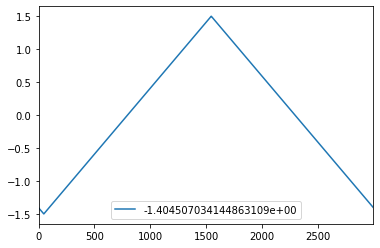

In [19]:
# test some faulty stuff
import pandas as pd
import numpy as np
t = np.linspace(0, 1, 3000)
df = pd.read_csv("/home/klnrdknt/git/nqontrol/foo.csv", header=-1)
df.plot()
